In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# load the coin image
img = cv2.imread('resources/coin_1.jpg')
       
plt.rcParams['figure.figsize'] = (4,3)

# convert image for showing
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

<Figure size 400x300 with 1 Axes>

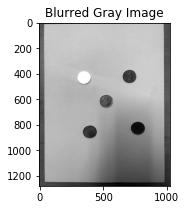

In [2]:
img_temp = cv2.resize(img, (1024, 1280)) 
img_temp = cv2.medianBlur(img_temp,7)

# convert image to gray
gray = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY)

# blur the image using gaussian blur
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(gray_blur, cmap='gray')
plt.title('Blurred Gray Image')
plt.show()

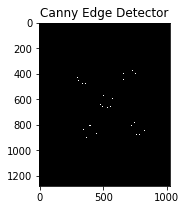

In [3]:
# canny edge detector
outline = cv2.Canny(gray_blur, 30, 135)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(outline, cmap='gray')
plt.title('Canny Edge Detector')
plt.show()

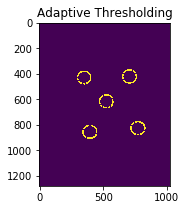

In [4]:
# Applying adaptive thresholding
thresh = cv2.adaptiveThreshold(outline, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(thresh)
plt.title('Adaptive Thresholding')
plt.show()

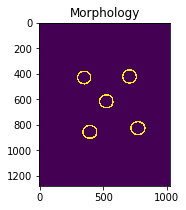

In [5]:
# Applying Morphology
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.rcParams['figure.figsize'] = (4,3)
plt.imshow(closing)
plt.title('Morphology')
plt.show()

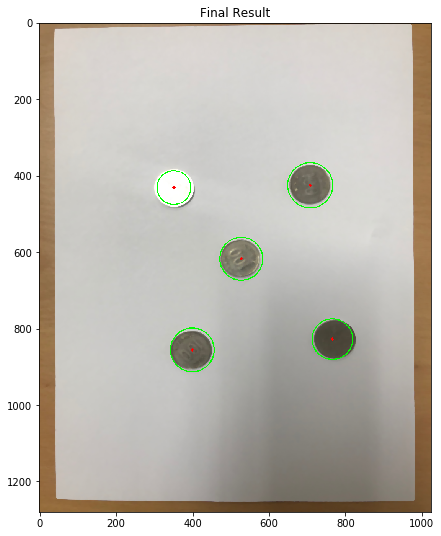

# coins : 5


In [7]:
# Drawing the circles
circles = cv2.HoughCircles(closing,cv2.HOUGH_GRADIENT,1,50,param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
n=1
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_temp,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_temp,(i[0],i[1]),2,(0,0,255),3)
    n+=1

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))
plt.title("Final Result")
plt.show()

print("# coins : " + str(circles.shape[1]))